In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Ethereum.csv")

In [3]:
df.shape

(2139, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2139.000000,2139.000000,2139.000000,2139.000000,2.139000e+03,2.139000e+03
mean,364.479271,379.195197,348.114374,365.626537,6.876824e+09,3.956237e+10
std,574.604947,602.519272,542.569584,576.459891,1.054187e+10,6.607921e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,3.221363e+07
25%,13.513950,14.049800,13.098350,13.553650,3.727815e+07,1.127754e+09
50%,197.095000,203.466639,189.127706,197.079000,2.081810e+09,2.055580e+10
75%,379.919495,389.779700,368.680476,380.463534,9.277913e+09,4.114991e+10
max,4174.635873,4362.350542,3785.848603,4168.701049,8.448291e+10,4.828819e+11


In [5]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2139 non-null   object 
 1   Open        2139 non-null   float64
 2   High        2139 non-null   float64
 3   Low         2139 non-null   float64
 4   Close       2139 non-null   float64
 5   Volume      2139 non-null   float64
 6   Market Cap  2139 non-null   float64
dtypes: float64(6), object(1)
memory usage: 117.1+ KB


In [7]:
df.drop(['Date'],axis=1,inplace=True)

In [8]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
0,2508.770462,2606.432929,2469.388144,2583.048966,2.778349e+10,3.003900e+11
1,2372.690096,2547.367910,2312.640169,2508.391632,2.709295e+10,2.916739e+11
2,2354.752218,2447.227868,2265.758003,2372.484454,2.572436e+10,2.758389e+11


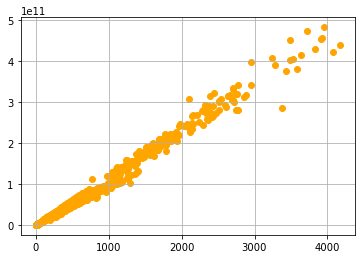

In [9]:
plt.scatter(df['Open'], df['Market Cap'], color='orange')
plt.grid(True)
plt.show()

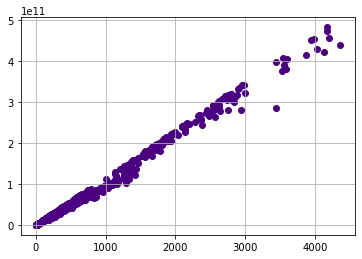

In [10]:
plt.scatter(df['High'], df['Market Cap'], color='indigo')
plt.grid(True)
plt.show()

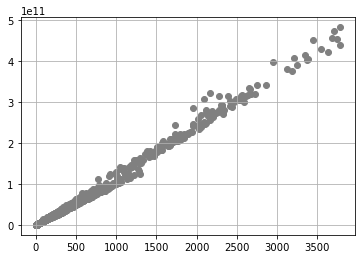

In [11]:
plt.scatter(df['Low'], df['Market Cap'], color='grey')
plt.grid(True)
plt.show()

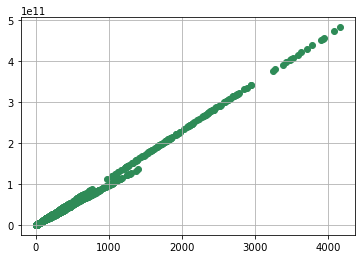

In [12]:
plt.scatter(df['Close'], df['Market Cap'], color='seagreen')
plt.grid(True)
plt.show()

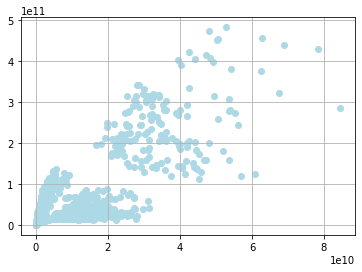

In [13]:
plt.scatter(df['Volume'], df['Market Cap'], color='lightblue')
plt.grid(True)
plt.show()

### Model

In [14]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [15]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [16]:
print(utils.multiclass.type_of_target(y))

continuous


In [17]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [18]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [20]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [21]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 765.8414756769346
Coefficients: 
 [ 1.49085168e+00 -2.81026407e+00  1.17983280e+00  9.96353690e-01
  7.32933136e-09]


In [22]:
X = sm.add_constant(X)

In [23]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [24]:
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     455.6
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:41:13   Log-Likelihood:                -16003.
No. Observations:                2139   AIC:                         3.202e+04
Df Residuals:                    2133   BIC:                         3.205e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        765.8415     11.503     66.578      0.0

In [19]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [26]:
y_pred = model.predict(X_test)

In [27]:
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
1167,1044.948959,1565
233,1187.569718,1708
1918,771.786574,423
1410,950.273148,1094
1817,775.462880,520
...,...,...
1346,1018.692811,1468
125,2371.741579,2034
1807,775.208839,416
1759,774.053409,396


In [20]:
model1 =  LinearRegression()

In [21]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [30]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [22]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.5212347075828228]

In [23]:
y_pred1 = model1.predict(X_test)

In [24]:
df2=pd.DataFrame({'Predicted values':y_pred1,'Actual values':encoded_test})
df2

,Predicted values,Actual values
0,1110.359267,1614
1,1146.381071,1705
2,1185.344356,1759
3,786.466952,385
4,1231.492068,1789
...,...,...
637,787.258180,489
638,1243.077992,1798
639,2231.331892,2030
640,858.312780,657


In [25]:
import pickle
pkl_file= open('ethereumf.pkl',"wb")
pickle.dump(model1,pkl_file)
pkl_file.close()